In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

In [2]:
data = pd.read_csv('fruit_classification_dataset.csv')
data.head()

,size (cm),shape,weight (g),avg_price (₹),color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon
2,7.8,round,319.0,91.3,green,sweet,custard apple
3,20.0,oval,1607.0,85.7,orange,sweet,papaya
4,10.2,long,131.5,37.8,yellow,sweet,banana


In [3]:
data.describe()

,size (cm),weight (g),avg_price (₹)
count,10000.000000,10000.000000,10000.000000
mean,8.430600,455.457720,77.016720
std,6.396915,731.643087,38.946916
min,0.900000,4.500000,9.000000
25%,3.700000,45.800000,45.575000
50%,7.200000,168.800000,75.400000
75%,10.100000,365.275000,100.700000
max,27.500000,3299.800000,165.000000


In [4]:
data.describe(include = 'O')

,shape,color,taste,fruit_name
count,10000,10000,10000,10000
unique,3,8,3,20
top,round,green,sweet,pomegranate
freq,5016,2029,7504,534


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size (cm)      10000 non-null  float64
 1   shape          10000 non-null  object 
 2   weight (g)     10000 non-null  float64
 3   avg_price (₹)  10000 non-null  float64
 4   color          10000 non-null  object 
 5   taste          10000 non-null  object 
 6   fruit_name     10000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 547.0+ KB


### EDA

In [6]:
data.isnull().sum()

size (cm)        0
shape            0
weight (g)       0
avg_price (₹)    0
color            0
taste            0
fruit_name       0
dtype: int64

In [7]:
data.duplicated().sum()

246

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(9754, 7)

### Univariate Analysis

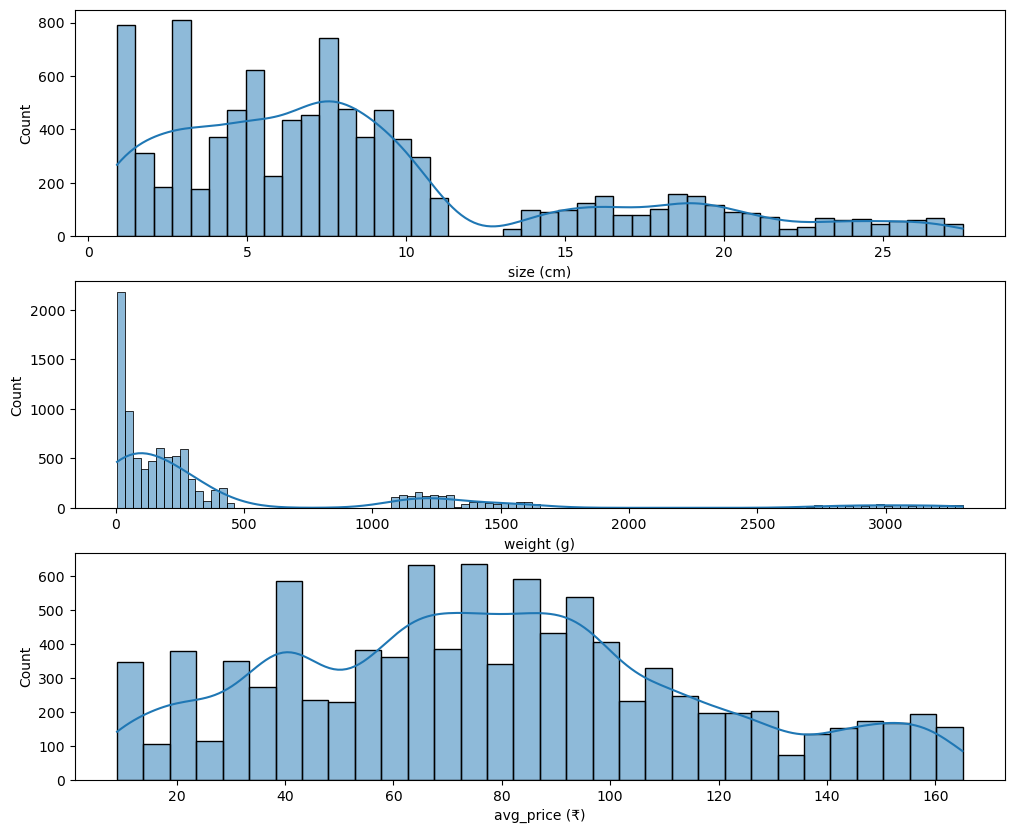

In [11]:
cols = ['size (cm)','weight (g)','avg_price (₹)']

plt.figure(figsize = (12,10),facecolor = 'white')
plotnumber = 1

for col in cols:
    plotnumber >= 3
    ax = plt.subplot(3,1,plotnumber)
    sns.histplot(x = data[col],kde = True)
    plotnumber += 1

   

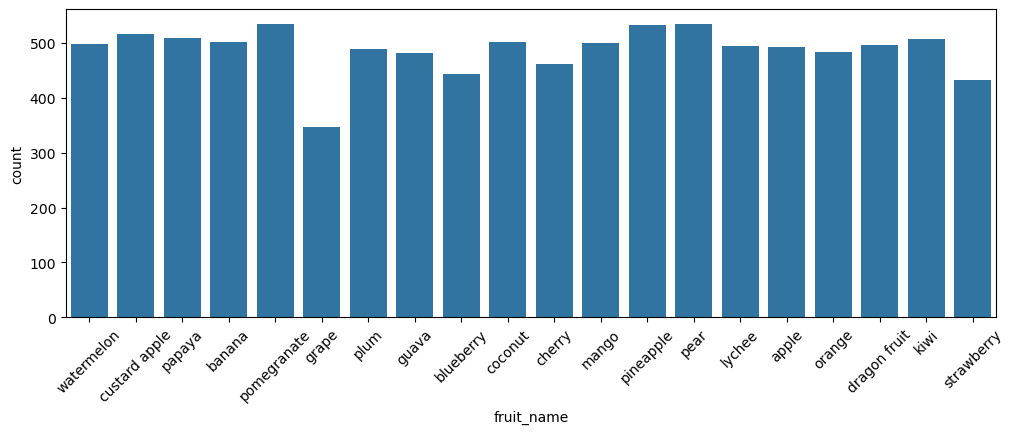

In [12]:
plt.figure(figsize= (12,4))
sns.countplot(x = data['fruit_name'])
plt.xticks(rotation=45)
plt.show()

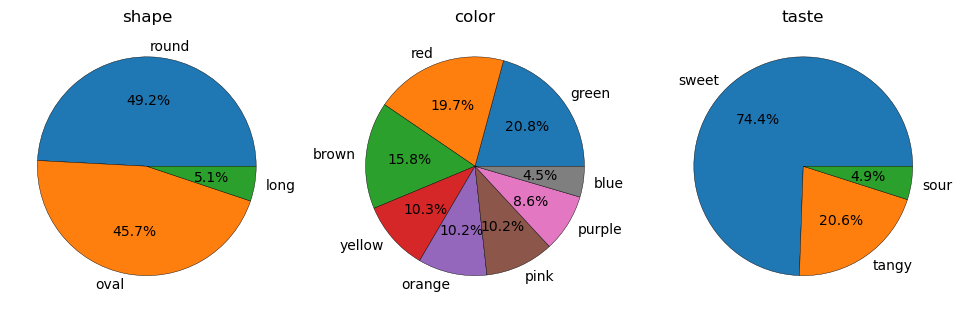

In [13]:
cols = ['shape','color','taste']

plt.figure(figsize = (12,10))
plotnumber = 1

for col in cols :
    
    counts = data[col].value_counts()
    labels = counts.index

    ax = plt.subplot(1,3,plotnumber)
    plt.pie(counts , labels = labels ,autopct='%1.1f%%',labeldistance=1.1,wedgeprops = {'linewidth' :0.3,'edgecolor' : 'black'} )
    plt.title(col)
    plotnumber += 1
plt.show()    

In [14]:
data[['size (cm)','weight (g)','avg_price (₹)']].groupby(data['fruit_name']).mean()

,size (cm),weight (g),avg_price (₹)
fruit_name,,,
apple,5.995732,149.811992,79.753252
banana,10.005578,119.986255,40.033865
blueberry,1.006546,5.005192,39.909029
cherry,3.001082,10.017532,29.954978
coconut,17.964143,1194.707570,100.050797
custard apple,8.003876,300.437984,90.357171
dragon fruit,10.017339,400.822984,150.512500
grape,0.993353,5.019075,10.018208
guava,7.004366,200.095426,60.249896


In [15]:
data[['shape','color','taste']].groupby(data['fruit_name']).apply(lambda x: x.mode().iloc[0])

,shape,color,taste
fruit_name,,,
apple,round,red,sweet
banana,long,yellow,sweet
blueberry,round,blue,sweet
cherry,oval,red,sweet
coconut,round,brown,sweet
custard apple,round,green,sweet
dragon fruit,oval,pink,sweet
grape,round,purple,sweet
guava,round,green,sour


### Pre_processing

In [16]:
data.rename (columns ={'avg_price (₹)':'avg_price'},inplace = True )
data.rename (columns ={'size (cm)':'size'},inplace = True )
data.rename (columns ={'weight (g)':'weight'},inplace = True )
data.head()

,size,shape,weight,avg_price,color,taste,fruit_name
0,25.4,round,3089.2,137.1,green,sweet,watermelon
1,24.6,round,3283.9,163.8,green,sweet,watermelon
2,7.8,round,319.0,91.3,green,sweet,custard apple
3,20.0,oval,1607.0,85.7,orange,sweet,papaya
4,10.2,long,131.5,37.8,yellow,sweet,banana


In [17]:
X = data.drop('avg_price',axis = 1)
y = data['avg_price']

### Encoding

In [18]:
cols = ['shape','color','taste','fruit_name']
x = pd.get_dummies(X , columns = cols , drop_first = True).astype(int)

In [19]:
x.columns

Index(['size', 'weight', 'shape_oval', 'shape_round', 'color_brown',
       'color_green', 'color_orange', 'color_pink', 'color_purple',
       'color_red', 'color_yellow', 'taste_sweet', 'taste_tangy',
       'fruit_name_banana', 'fruit_name_blueberry', 'fruit_name_cherry',
       'fruit_name_coconut', 'fruit_name_custard apple',
       'fruit_name_dragon fruit', 'fruit_name_grape', 'fruit_name_guava',
       'fruit_name_kiwi', 'fruit_name_lychee', 'fruit_name_mango',
       'fruit_name_orange', 'fruit_name_papaya', 'fruit_name_pear',
       'fruit_name_pineapple', 'fruit_name_plum', 'fruit_name_pomegranate',
       'fruit_name_strawberry', 'fruit_name_watermelon'],
      dtype='object')

In [20]:
x

,size,weight,shape_oval,shape_round,color_brown,color_green,color_orange,color_pink,color_purple,color_red,...,fruit_name_lychee,fruit_name_mango,fruit_name_orange,fruit_name_papaya,fruit_name_pear,fruit_name_pineapple,fruit_name_plum,fruit_name_pomegranate,fruit_name_strawberry,fruit_name_watermelon
0,25,3089,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,24,3283,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,7,319,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,1607,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,10,131,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,49,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9996,2,18,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9997,8,177,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9998,18,1165,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [23]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2,random_state = 42)
x1_train,x_val,y1_train,y_val=train_test_split(x_train,y_train,test_size =0.2,random_state = 42)

In [24]:
x_train.shape

(7803, 32)

In [25]:
x_test.shape

(1951, 32)

In [26]:
x1_train.shape

(6242, 32)

In [28]:
x_val.shape

(1561, 32)

### Model Creation

In [29]:
DT_model = DecisionTreeRegressor().fit(x_train,y_train)
DT_model

DecisionTreeRegressor()

In [33]:
hyperparameters = { 'criterion' : ['squared_error'],
                     'max_depth':np.arange(2,8),
                     'min_samples_split':np.arange(2,8),
                    'min_samples_leaf':np.arange(2,8),
                  }

GSCV = GridSearchCV(DT_model,hyperparameters,cv = 5)
GSCV_model = GSCV.fit(x_train,y_train)
GSCV_model

C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [34]:
GSCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [35]:
dt_model = DecisionTreeRegressor(criterion= 'squared_error',max_depth= 7,
                                  min_samples_leaf= 6,min_samples_split= 2).fit(x_train,y_train)
dt_model

DecisionTreeRegressor(max_depth=7, min_samples_leaf=6)

In [36]:
y_dt_pred = dt_model.predict(x_test)
y_dt_pred

array([119.80996785,  40.23562092,  60.23383686, ...,  70.1877193 ,
        80.59162304,  10.0056338 ])

In [42]:
x_test.shape

(1951, 32)

### Model Evaluation

In [47]:
r2_score,mean_absolute_error,root_mean_squared_error
mae = mean_absolute_error(y_test,y_dt_pred)
print('mae -',mae)
rmse = root_mean_squared_error(y_test,y_dt_pred)
print('rmse -',rmse)
r2score = r2_score(y_test,y_dt_pred)
print('r2score -',r2score)
r2_train = dt_model.score(x_train,y_train)
print('r2_train -',r2_train)

mae - 4.709869476524897
rmse - 5.982527583136593
r2score - 0.9757164355230399
r2_train - 0.976708097324078


In [43]:
adjusted_r2 = 1-((1-0.9757164355230399)*(1951-1)/(1951-32-1))
adjusted_r2

0.975311287419149